# Simulate Driver Behavior & Impairment
## Jessica Desotell & Apoorva Mathur


### Import Libraries
#### refer to requirments.txt for install list

In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from tqdm import tqdm_notebook as tq

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from collections import Counter, OrderedDict

### Read in Data csv that has been queried from SHRP2 NDS query

In [2]:
# Import data for probabilities
probability_table = pd.read_csv('driver_attention.csv')
driver_impairment_table = pd.read_csv('driver_impairment.csv')

In [3]:
# View data
display(probability_table.tail())

,Impairments,None,Distracted,"Drowsy, sleepy, asleep, fatigued",Exceeded speed limit,Exceeded safe speed but not speed limit,Driving slowly: below speed limit,Driving slowly in relation to other traffic: not below speed limit,Passing on right,Illegal passing,...,Avoiding other vehicle,Avoiding animal,Apparent unfamiliarity with roadway,Apparent unfamiliarity with vehicle,Apparent general inexperience driving,Use of cruise control contributed to late braking,Other,Unknown,NULL (no value),Total
10,Deaf,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,Other,51,26,2,7,2,1,0,0,0,...,0,0,1,0,0,0,0,1,0,107
12,Unknown,4,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
13,NULL (no value),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,Total,32966,1893,594,1135,363,171,155,78,59,...,88,7,76,4,13,0,109,9,0,40859


In [4]:
behavior_list = []
for col in probability_table:
    behavior_list.append(col)
behavior_list = behavior_list[1:-1]

### Create Functions for experiments

In [5]:
def create_behavior_prob(df, behaviors):
    df_sub = df[behaviors]
    TOTAL_CRASHES = df_sub.iloc[14].sum()
#     print(df_sub.iloc[14])
#     print(TOTAL_CRASHES)
    
    BEHAVIOR_PROB_DICT = {}
    for col in df_sub:
        if (col == 'Impairments') | (col == 'NULL (no value)') | (col == 'Total'):
            next
        else:
            BEHAVIOR_PROB_DICT[col] = (df_sub[col].iloc[14] / TOTAL_CRASHES)
#             print((df_sub[col].iloc[14] / TOTAL_CRASHES))
    
    
    return BEHAVIOR_PROB_DICT

def simulate_driver_behavior(behavior_prob, n):
    # Assign each driver a random behavior
    driver_behavior = []
    items = list(behavior_prob.items())  # List of tuples of (key,values)




    for i in tq(range(n)):
        assigned_behavior = 0
        np.random.shuffle(items)
        while assigned_behavior == 0:
            for key, value in items:
            #     print(key, ":", value)
                behavior = np.random.binomial(1, value)
                if behavior == 1:
                    driver_behavior.append(key)
                    assigned_behavior = 1
                    break
    return driver_behavior

def simulate_driver_impairment(driver_behavior):
    driver_impairment = []

    for driver in tq(driver_behavior):
    #     print(driver)
    #     print(np.array(driver_impairment_table[driver]))
        probs = np.array(driver_impairment_table[driver])
        impairment_dict = {}
        for c, prob in enumerate(probs):
            impairment_dict[driver_impairment_table['Impairments'].iloc[c]] = prob
    #     print(impairment_dict)


        assigned_impairment = 0
        items = list(impairment_dict.items())
        np.random.shuffle(items)
        while assigned_impairment == 0:
            for key, value in items:
            #     print(key, ":", value)
                impairment = np.random.binomial(1, value)
                if impairment == 1:
                    driver_impairment.append(key)
                    assigned_impairment = 1
                    break
    return driver_impairment

def create_driver_df(driver_behavior, driver_impairment):
    df = pd.DataFrame(list(zip(driver_behavior, driver_impairment)), columns=['behavior','impairment'])
    return df

def sort_drivers(driver_behavior, driver_impairment):
    behavior = Counter(driver_behavior)
    sorted_b = {k: v for k, v in sorted(behavior.items(), key=lambda item: item[1], reverse=True)}


    impairment = Counter(driver_impairment)
    sorted_im = {k: v for k, v in sorted(impairment.items(), key=lambda item: item[1], reverse=True)}
    
    return sorted_b, sorted_im

def visualize_driver(sort_dict, title, x_label):
    fig, ax = plt.subplots(figsize=[16,8])
    plt.bar(sort_dict.keys(), sort_dict.values(), color='g')
    plt.xticks(rotation='vertical')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel("Number of Drivers")
    plt.show()
    plt.close()
    return

### Experiment 1
#### All Behaviors are inlcuded

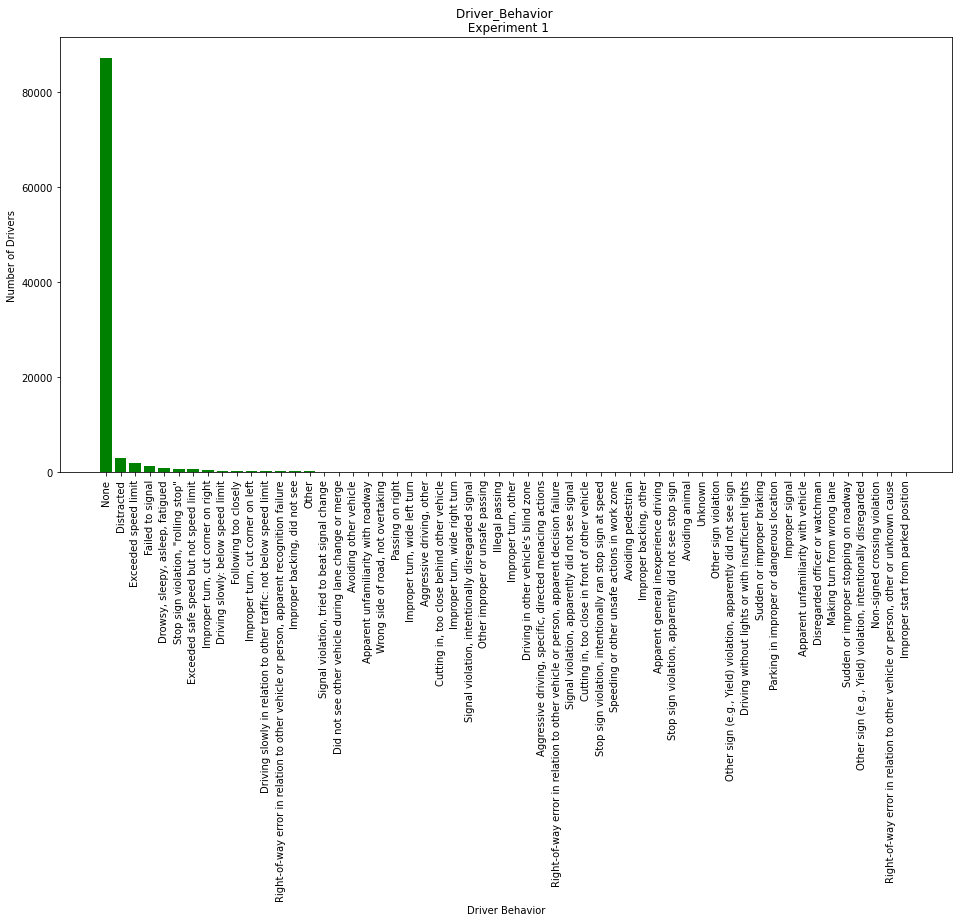

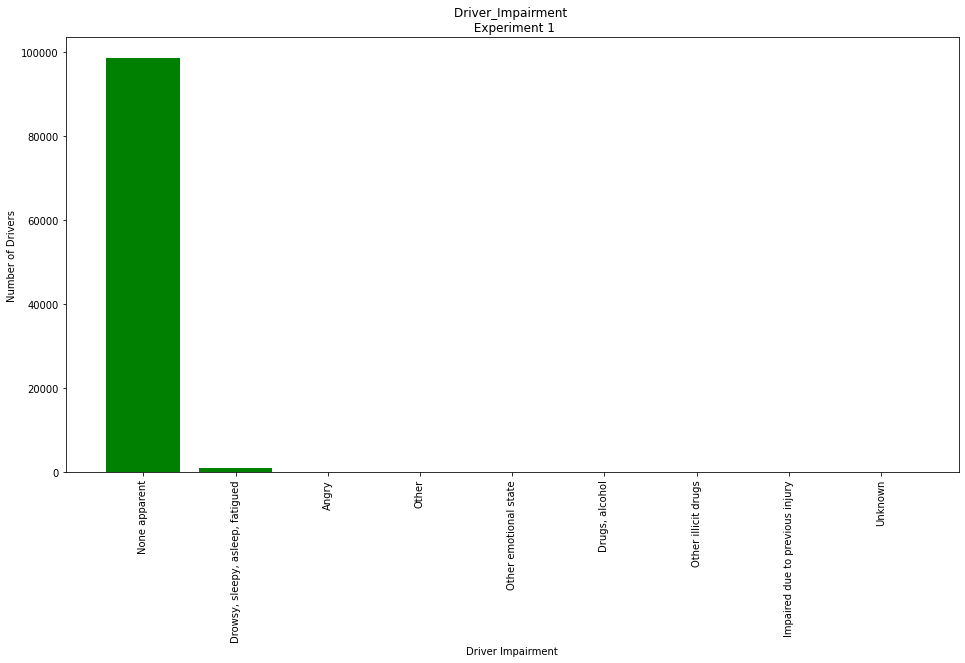

In [6]:
exp_1_behavior = create_behavior_prob(probability_table, behavior_list)

exp_1_driver_behavior = simulate_driver_behavior(exp_1_behavior, 100000)

exp_1_driver_impairment = simulate_driver_impairment(exp_1_driver_behavior)

exp_1_driver_df = create_driver_df(exp_1_driver_behavior, exp_1_driver_impairment)

exp_1_sorted_behavior, exp_1_sorted_impairment = sort_drivers(exp_1_driver_behavior, exp_1_driver_impairment)

visualize_driver(exp_1_sorted_behavior, 'Driver_Behavior \n Experiment 1', 'Driver Behavior')

visualize_driver(exp_1_sorted_impairment, 'Driver_Impairment \n Experiment 1', 'Driver Impairment')

### Experiment 2
#### Remove 'None' from the behaviors to see the rest

In [7]:
# Remove 'None' from behavior
behavior_list = [ 'Distracted',
 'Drowsy, sleepy, asleep, fatigued',
 'Exceeded speed limit',
 'Exceeded safe speed but not speed limit',
 'Driving slowly: below speed limit',
 'Driving slowly in relation to other traffic: not below speed limit',
 'Passing on right',
 'Illegal passing',
 'Other improper or unsafe passing',
 'Cutting in, too close in front of other vehicle',
 'Cutting in, too close behind other vehicle',
 'Making turn from wrong lane',
 'Did not see other vehicle during lane change or merge',
 "Driving in other vehicle's blind zone",
 'Aggressive driving, specific, directed menacing actions',
 'Aggressive driving, other',
 'Wrong side of road, not overtaking',
 'Following too closely',
 'Failed to signal',
 'Improper signal',
 'Improper turn, wide right turn',
 'Improper turn, cut corner on right',
 'Improper turn, wide left turn',
 'Improper turn, cut corner on left',
 'Improper turn, other',
 'Improper backing, did not see',
 'Improper backing, other',
 'Improper start from parked position',
 'Disregarded officer or watchman',
 'Signal violation, apparently did not see signal',
 'Signal violation, intentionally disregarded signal',
 'Signal violation, tried to beat signal change',
 'Stop sign violation, apparently did not see stop sign',
 'Stop sign violation, intentionally ran stop sign at speed',
 'Stop sign violation, "rolling stop"',
 'Other sign (e.g., Yield) violation, apparently did not see sign',
 'Other sign (e.g., Yield) violation, intentionally disregarded',
 'Other sign violation',
 'Non-signed crossing violation',
 'Right-of-way error in relation to other vehicle or person, apparent recognition failure',
 'Right-of-way error in relation to other vehicle or person, apparent decision failure',
 'Right-of-way error in relation to other vehicle or person, other or unknown cause',
 'Sudden or improper braking',
 'Sudden or improper stopping on roadway',
 'Parking in improper or dangerous location',
 'Speeding or other unsafe actions in work zone',
 'Failure to dim headlights',
 'Driving without lights or with insufficient lights',
 'Avoiding pedestrian',
 'Avoiding other vehicle',
 'Avoiding animal',
 'Apparent unfamiliarity with roadway',
 'Apparent unfamiliarity with vehicle',
 'Apparent general inexperience driving',
 'Use of cruise control contributed to late braking',
 'Other',
 'Unknown',
 'NULL (no value)']

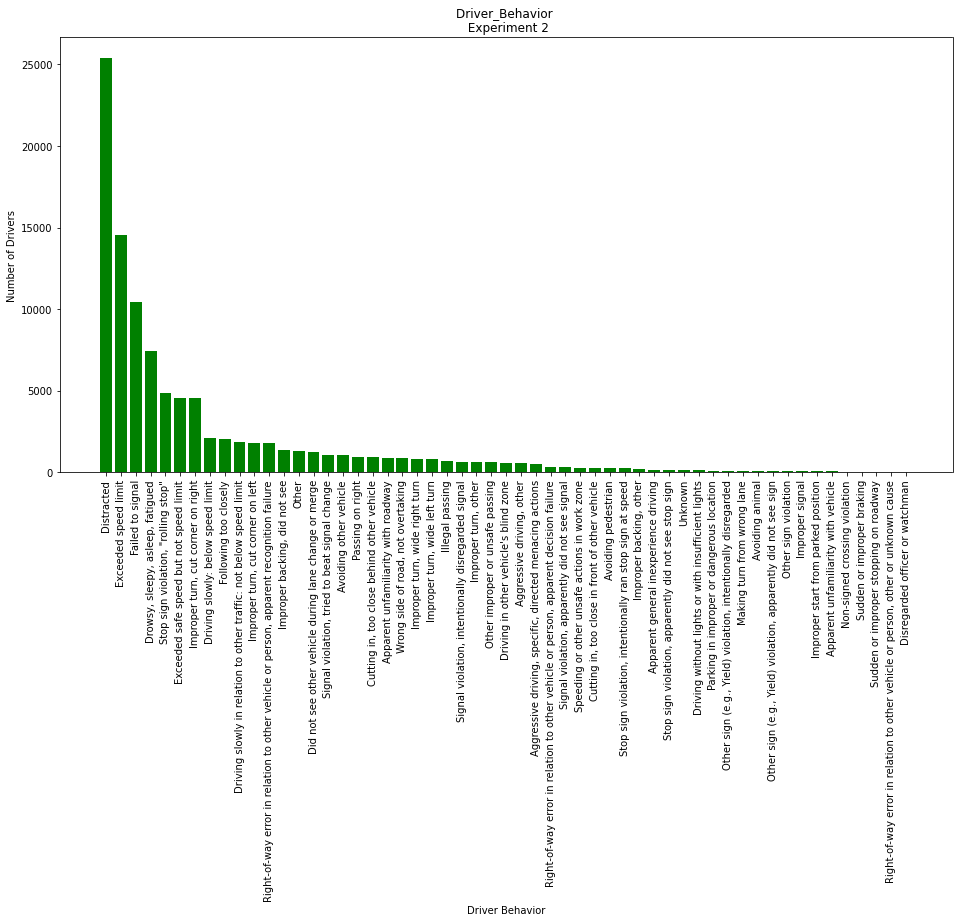

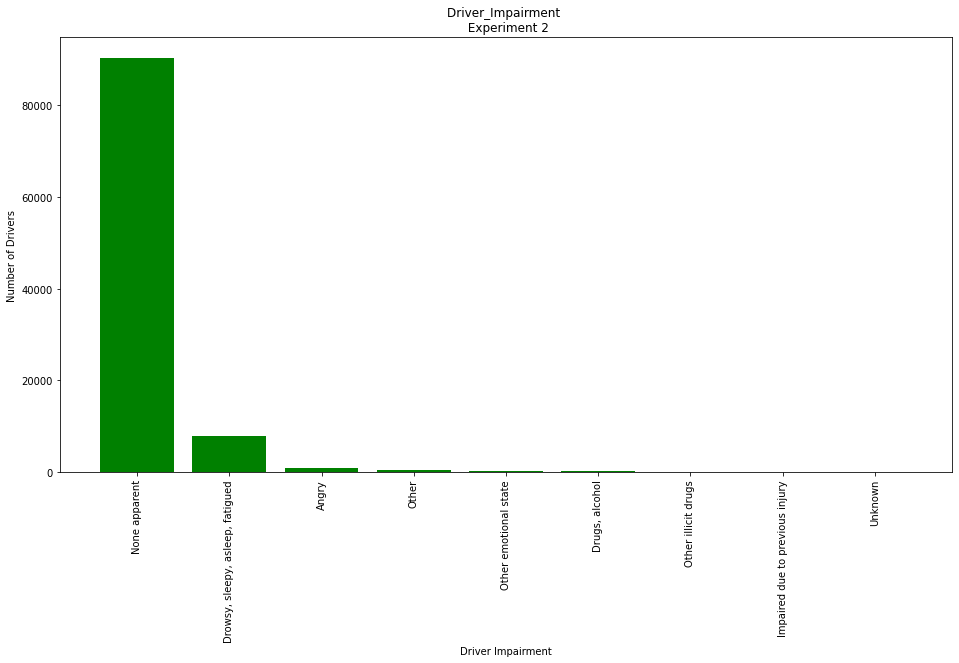

In [8]:
exp_2_behavior = create_behavior_prob(probability_table, behavior_list)

exp_2_driver_behavior = simulate_driver_behavior(exp_2_behavior, 100000)

exp_2_driver_impairment = simulate_driver_impairment(exp_2_driver_behavior)

exp_2_driver_df = create_driver_df(exp_2_driver_behavior, exp_2_driver_impairment)

exp_2_sorted_behavior, exp_2_sorted_impairment = sort_drivers(exp_2_driver_behavior, exp_2_driver_impairment)

visualize_driver(exp_2_sorted_behavior, 'Driver_Behavior \n Experiment 2', 'Driver Behavior')

visualize_driver(exp_2_sorted_impairment, 'Driver_Impairment \n Experiment 2', 'Driver Impairment')